# Goal
1. genearate data set as CNN network input


# Process

In [30]:
import numpy as np
#获得４＊Ｌ维０１矩阵的函数
d = {'a':0, 'A':0, 'g':1, 'G':1, 'c':2, 'C':2, 't':3, 'T':3, 'N':4, 'n':4}
def seq_to_mat(seq):
    mat = np.zeros((5,len(seq)))
    for i in range(len(seq)):
        mat[d[seq[i]],i] =1
        #mat[d[seq[i]],i] =1
        #mat[d[seq[i]],i] = 1
        pass
    mat = mat[:4,:]
    return mat

In [31]:
rootdir =  '/home/yinqijin/WorkSpace/2.RNA_Structure_Profile'
cutdown_len  = 80  #13

In [32]:
#生成每个seq的频率计数
from collections import defaultdict
seq_freq = defaultdict(int)
#生成seq 的 计数频率
with open(rootdir+'/Orig_data/sharpr.txt','r')  as f:
    with open(rootdir+'/Orig_data/score.txt','r') as f1:     
        while 1:
            name = f.readline()
            if not name :
                break
            sequence = f.readline()
            scores = f1.readline().split()[1:]  #得到每个碱基的分数
            bp_name  = name.split('_')  [:-1]
            bp_point = name.split('_')[-1]
            for bp_iter  in range(0,len(sequence)-cutdown_len-1):
                seq_temp = sequence[bp_iter:(bp_iter+cutdown_len)].strip()
                seq_freq[seq_temp] +=1

In [33]:
data = []
with open(rootdir+'/Orig_data/sharpr.txt','r')  as f:
    with open(rootdir+'/Orig_data/score.txt','r') as f1:     
        while 1:
            name = f.readline()
            if not name :
                break
            sequence = f.readline()
            scores = f1.readline().split()[1:]  #得到每个碱基的分数
            bp_name  = name.split('_')  [:-1]
            bp_point = name.split('_')[-1]
            for bp_iter  in range(0,len(sequence)-cutdown_len-1):
                #只有计数频率为1才加入数据集
                #如果不需要判断,全部都加入数据集,只要去掉下面两句话,以下其余代码调整缩进即可
                seq_temp = sequence[bp_iter:(bp_iter+cutdown_len)].strip()
                if  1== seq_freq[seq_temp] :
                    
                    bp_seq_temp = {}
                    bp_seq_temp['seq'] =sequence[bp_iter:(bp_iter+cutdown_len)].strip()
                    bp_seq_temp['mat'] = seq_to_mat(bp_seq_temp['seq'] )
                    bp_seq_temp['name'] = bp_name[0]+'_'+bp_name[1]+'_'+bp_name[2]+'_'+bp_name[3]+'_'+ str(int(bp_point)+bp_iter*(cutdown_len-1))
                    scores_str = scores[bp_iter:(bp_iter+cutdown_len)]
                    bp_seq_temp['score'] = [float(item) for item in scores_str]

                    #加入seq的出现频率计次 没必要了
                    #bp_seq_temp['freq'] = seq_freq[bp_seq_temp['seq']]
                    data.append(bp_seq_temp)

# Change Format

In [34]:
data2 = {}
for key in data[0].keys():
    data2['seq'] = [item['seq'] for item in data ]
    data2['name'] = [item['name'] for item in data]
    data2['score'] = [item['score'] for item in data]
    data2['mat'] = [item['mat'] for item in data]

In [35]:
print data2['seq'][:2]
print data2['name'][:2]
print data2['score'][:2]
print data2['mat'][:2]

['GGGAGCCCAGAAGGCGACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATC', 'GGAGCCCAGAAGGCGACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCG']
['>H1hesc_1_0_chr20_30310735', '>H1hesc_1_0_chr20_30310814']
[[0.068, 0.068, 0.068, 0.055, 0.042, 0.028, 0.015, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.024, 0.045, 0.067, 0.088, 0.11, 0.088, 0.066, 0.044, 0.022, 0.0, -0.042, -0.084, -0.127, -0.169, -0.211, -0.226, -0.241, -0.255, -0.27, -0.285, -0.28, -0.274, -0.269, -0.263, -0.258, -0.258, -0.258, -0.258, -0.258, -0.258, -0.267, -0.276, -0.286, -0.295, -0.304, -0.282, -0.26, -0.237, -0.215, -0.193, -0.154, -0.116, -0.077, -0.039, 0.0, 0.0, 0.0], [0.068, 0.068, 0.055, 0.042, 0.028, 0.015, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.

In [36]:
#统计seq出现的次数 
#没必要 验证性意义

from collections import defaultdict



seqdict_order = defaultdict(list)

for index in range(0,len(data2['seq'])):
    seqdict_order[ data2['seq'][index]].append(int(index))

remove_point = []
for key in seqdict_order.keys():
    key_dict = seqdict_order[key]
    if 1 !=  len(key_dict):
        for key_order in key_dict:
            remove_point.append(key_order)
remove_point  = sorted(remove_point)

print remove_point[:4]

[]


# Save Data

import hickle  as hkl

hkl.dump(data2,'./Gen_data/CROSS_Net_input.hkl')

### Tips  删除dict某些值

# Generate NetWork

In [37]:
import theano
from lasagne.layers import InputLayer
from lasagne.layers import DenseLayer
from lasagne.layers import DropoutLayer
try:
    from lasagne.layers.dnn import Conv2DDNNLayer as Conv2DLayer
    from lasagne.layers.dnn import MaxPool2DDNNLayer as MaxPool2DLayer
    print 'Using Lasagne.layers.dnn (faster)'
except ImportError:
    from lasagne.layers import Conv2DLayer
    from lasagne.layers import MaxPool2DLayer
    print 'Using Lasagne.layers (slower)'
from lasagne.nonlinearities import softmax, rectify, leaky_rectify
from lasagne.updates import adam
from lasagne.objectives import squared_error

from nolearn.lasagne import NeuralNet
from nolearn.lasagne import TrainSplit
from nolearn.lasagne import objective
from nolearn.lasagne import BatchIterator

from lasagne.nonlinearities import tanh 
floatX = theano.config.floatX

Using Lasagne.layers.dnn (faster)


In [38]:
# cutdown_len = 13 #在此上面已经定义
layer1 = InputLayer(shape=(None,cutdown_len,4))
layer2 = DenseLayer(layer1, num_units=20 ,nonlinearity=tanh)
network = DenseLayer(layer2,num_units=1,nonlinearity=tanh)

In [39]:

lr = theano.shared(np.float32(1e-4))

net = NeuralNet(
            network,
            max_epochs=50,
            update=adam,
            update_learning_rate=lr,
            train_split=TrainSplit(eval_size=0.1),
                regression = True,
            objective_loss_function = squared_error,
            #on_epoch_finished=[
            #    AdjustVariable(lr, target=1e-8, half_life=20)],
            verbose=4)

# Import Data

In [40]:
X = data2['mat']
Y = data2['score']

In [41]:
Y_ = [ item[(len(item)-1)/2] for item in Y]

In [42]:
print len(X),len(Y_)
print Y_[:2]

1439793 1439793
[0.066, 0.044]


In [43]:
X_ = np.zeros((len(X),4,cutdown_len))
print X_.shape

(1439793, 4, 80)


In [44]:
X_[:,:,:] = X[:]

In [45]:
Y_ = np.array(Y_)

In [46]:
from sklearn.cross_validation import ShuffleSplit
rs = ShuffleSplit(len(Y_), n_iter=1)

In [47]:
X_[:2]

array([[[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
          0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
          0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.],
        [ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
          1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
          0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
          0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
          0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.

In [48]:
for train_idx, test_idx in rs:
    X_train = X_[train_idx,:]
    y_train = Y_[train_idx]
    X_test = X_[test_idx,:]
    y_test = Y_[test_idx]

In [49]:
print X_train[:2]
print y_train[:2]

[[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.
    0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.
    0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.
    0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.
    0.  0.  0.  0.  0.  1.  0.  0.]
  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.
    0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
    1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.
    0.  0.  1.  0.  0.  0.  0.  0.]
  [ 1.  0.  1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.
    0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.
    0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.
    0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.
    0.  0.  0.  0.  0.  0.  

In [50]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [51]:
print X_train[:2]
print y_train[:2]

[[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.
    0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.
    0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.
    0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.
    0.  0.  0.  0.  0.  1.  0.  0.]
  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.
    0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
    1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.
    0.  0.  1.  0.  0.  0.  0.  0.]
  [ 1.  0.  1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.
    0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.
    0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.
    0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.
    0.  0.  0.  0.  0.  0.  

#方便测试用
cutdown_len = 13
layer1 = InputLayer(shape=(None,4,cutdown_len))
layer2 = DenseLayer(layer1, num_units=20 ,nonlinearity=tanh)
network = DenseLayer(layer2,num_units=1,nonlinearity=tanh)

lr = theano.shared(np.float32(1e-4))

net = NeuralNet(
            network,
            max_epochs=50,
            update=adam,
            update_learning_rate=lr,
            train_split=TrainSplit(eval_size=0.1),
                regression = True,
            objective_loss_function = squared_error,
            #on_epoch_finished=[
            #    AdjustVariable(lr, target=1e-8, half_life=20)],
            verbose=4)

In [52]:
net.fit(X_train, y_train)

# Neural Network with 6441 learnable parameters

## Layer information

  #    name  size
---  ------  ------
  0          80x4
  1          20
  2          1

  epoch    trn loss    val loss    trn/val  dur
-------  ----------  ----------  ---------  -----
      1     0.48554     0.47742    1.01702  8.98s
      2     0.47316     0.47536    0.99536  9.10s
      3     0.47168     0.47448    0.99410  9.16s
      4     0.47085     0.47395    0.99347  8.80s
      5     0.47029     0.47357    0.99306  9.02s
      6     0.46987     0.47328    0.99278  8.87s
      7     0.46953     0.47304    0.99258  9.35s
      8     0.46924     0.47281    0.99244  8.92s
      9     0.46896     0.47259    0.99232  8.85s
     10     0.46871     0.47240    0.99218  9.16s
     11     0.46848     0.47224    0.99204  9.21s
     12     0.46829     0.47212    0.99189  8.62s
     13     0.46813     0.47204    0.99174  9.30s
     14     0.46799     0.47197    0.99157  8.89s
     15     0.46786     0.47193    0.99138 

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fb27bb9b990>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fb27bb9b890>,
     check_input=True, custom_scores=None,
     layers=[<lasagne.layers.dense.DenseLayer object at 0x7fb2d428db10>],
     loss=None, max_epochs=50, more_params={},
     objective=<function objective at 0x7fb27bb9fe60>,
     objective_loss_function=<function squared_error at 0x7fb287bbf398>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7fb1fd59dfc8>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x7fb1fd59df80>],
     regression=True, scores_train=[], scores_valid=[],
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x7fb2d420b210>,
     update=<function adam at 0x7fb287bbfde8>,
     update_learning_rate=<TensorType(float32, scalar)>,
     use_label_encode

# Save network values

from nolearn.lasagne import NeuralNet
net.initialize_layers()
net_params=[]
net.save_params_to('./Gen_data/CROSS_net_values.pkl')

# Test Network

## Load Network Values

import theano
from lasagne.layers import InputLayer
from lasagne.layers import DenseLayer
from lasagne.layers import DropoutLayer
try:
    from lasagne.layers.dnn import Conv2DDNNLayer as Conv2DLayer
    from lasagne.layers.dnn import MaxPool2DDNNLayer as MaxPool2DLayer
    print 'Using Lasagne.layers.dnn (faster)'
except ImportError:
    from lasagne.layers import Conv2DLayer
    from lasagne.layers import MaxPool2DLayer
    print 'Using Lasagne.layers (slower)'
from lasagne.nonlinearities import softmax, rectify, leaky_rectify
from lasagne.updates import adam
from lasagne.objectives import squared_error

from nolearn.lasagne import NeuralNet
from nolearn.lasagne import TrainSplit
from nolearn.lasagne import objective
from nolearn.lasagne import BatchIterator

from lasagne.nonlinearities import tanh 
floatX = theano.config.floatX

cutdown_len = 13
layer1 = InputLayer(shape=(None,cutdown_len,4))
layer2 = DenseLayer(layer1, num_units=20 ,nonlinearity=tanh)
network = DenseLayer(layer2,num_units=1,nonlinearity=tanh)

lr = theano.shared(np.float32(1e-4))

net = NeuralNet(
            network,
            max_epochs=7,
            update=adam,
            update_learning_rate=lr,
            train_split=TrainSplit(eval_size=0.1),
                regression = True,
            objective_loss_function = squared_error,
            #on_epoch_finished=[
            #    AdjustVariable(lr, target=1e-8, half_life=20)],
            verbose=4)

# Load  NetWork Values
from nolearn.lasagne import NeuralNet
net.initialize_layers()
net.load_params_from('./Gen_data/CROSS_net_values.pkl')

## Test

In [53]:
y_1 = net.predict(X_test[:10])
print y_1
print y_test[:10]


[[-0.01191795]
 [ 0.04735415]
 [ 0.02879003]
 [ 0.0481117 ]
 [-0.01866907]
 [-0.05912852]
 [ 0.03924243]
 [-0.07131457]
 [ 0.03253795]
 [-0.15271844]]
[ 0.35800001  0.         -0.412      -0.648       0.077       0.004      -0.417
  0.127      -0.155      -0.22400001]


In [54]:
y_pred = net.predict(X_test)

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

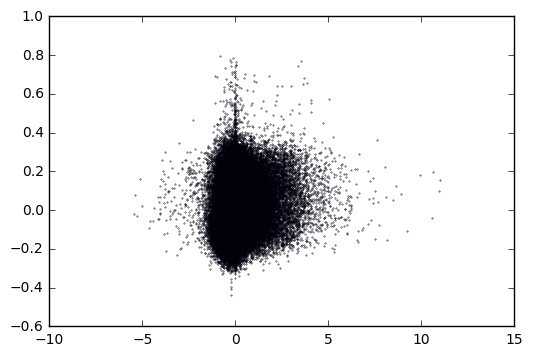

In [56]:
plt.scatter(y_test,y_pred,0.1)

In [57]:
from scipy import stats

In [58]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred[:,0])
print r_value

0.15240609088
